#### Feature selection for HighRisk

In [15]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [16]:
#En son veriler
X_train=pd.read_csv("X_train.csv", index_col="ID")
X_test=pd.read_csv("X_test.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")
y_test=pd.read_csv("y_test.csv", index_col="ID")

In [17]:
y_train["HighRisk"].value_counts()

HighRisk
LR    161
HR    137
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
# #only get one target
y_hr=y_train["HighRisk"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_hr_encode = label_encoder.fit_transform(y_hr)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_hr_encode)

In [19]:
X_train

,Gender_F,Gender_M,clinico.genetic.subgroup_MNA,clinico.genetic.subgroup_ST1,clinico.genetic.subgroup_ST4,clinico.genetic.subgroup_ST4S,MYCN.status_Amp,MYCN.status_NoAmp,Age,Unnamed: 14,...,Unnamed: 44712,Unnamed: 44713,PDE3B,Unnamed: 44715,LINC01588,Unnamed: 44717,Unnamed: 44718,Unnamed: 44719,Unnamed: 44720,Unnamed: 44721
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.480811,-0.488997,...,-1.653599,-0.106549,0.851564,-1.848442,0.378614,-1.019042,0.089275,-0.019078,0.488320,0.427556
ICGC_292,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.677666,1.277924,...,-1.338185,0.067910,1.017450,-0.278487,-1.188787,-0.878331,0.330762,-0.378721,-0.571040,-0.804698
ICGC_032,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.404137,-0.162796,...,0.974848,0.067910,1.143839,0.615659,0.854896,0.983374,0.049027,0.900780,0.712416,0.174353
ICGC_408,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.026905,0.471483,...,-0.873826,-0.869807,-0.736202,-0.132929,-0.920337,-1.419525,0.089275,-2.349844,-1.915612,0.039312
ICGC_108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.427002,-0.072185,...,0.002323,0.820265,-0.728302,0.012630,2.552192,0.777720,-0.796179,1.633899,-0.204338,0.663879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_309,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.738639,0.081854,...,-0.023962,0.493154,-0.270141,0.054218,-0.643228,-0.715973,-0.916923,-1.167170,-0.530295,0.039312
ICGC_371,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.518919,1.142007,...,-0.716120,-0.259200,0.180121,0.345336,-0.400757,-0.531968,0.230142,-0.357972,-0.082105,0.393796
ICGC_107,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.379579,0.081854,...,2.043750,0.067910,0.630382,0.470100,0.664383,1.416328,1.095472,1.087518,0.916139,0.292515


In [21]:
X=X_train.copy()
y=y_hr_encode

#### Random Forest Feature selection

In [22]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import accuracy_score, f1_score

skf = StratifiedKFold(n_splits=5)

rf = RandomForestClassifier()

# Initialize lists to store accuracy and F1 scores for each fold
accuracy_scores = []
f1_scores = []

## Number of top features
top_k = 300

# Initialize list to hold common features from each fold
common_features = []

# Iterate over each split
# Iterate over each split
for train_index, test_index in skf.split(X, y):
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]  
    y_train_temp, y_test_temp = y[train_index], y[test_index]

    # Initialize feature selectors
    selector_kbest = SelectKBest(score_func=f_classif, k=top_k)  # Adjust 'k' as per your requirements
    selector_percentile = SelectPercentile(score_func=f_classif, percentile=1)
    
    # Fit and transforX_train, y_trainm the data
    X_new_kbest = selector_kbest.fit_transform(X_train_temp, y_train_temp)
    X_new_percentile = selector_percentile.fit_transform(X_train_temp, y_train_temp)
    
    # Get the selected features
    selected_features_kbest = X_train_temp.columns[selector_kbest.get_support()]
    selected_features_percentile = X_train_temp.columns[selector_percentile.get_support()]
    
    # Get the common features and add to the list
    common_features_fold = set(selected_features_kbest) & set(selected_features_percentile)
    common_features.append(common_features_fold)
    #print("Common Features in thi Fold : ", common_features_fold )

    # Train the model on the selected features and compute the accuracy
    X_train_selected = X_train_temp[list(common_features_fold)]
    X_test_selected = X_test_temp[list(common_features_fold)]
    rf.fit(X_train_selected, y_train_temp)
    y_pred = rf.predict(X_test_selected)

     # Calculate accuracy
    accuracy = accuracy_score(y_test_temp, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_test_temp, y_pred, average="weighted")

    print(f'Accuracy for this fold: {accuracy}')
    print(f'F1 score for this fold: {f1}')

    # Append scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Calculate the mean accuracy and F1 score
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean F1 Score: {mean_f1_score}')


# Get the intersection of common features from all folds
final_common_features = set.intersection(*map(set, common_features))

print(f"Final common features: {final_common_features}")



Accuracy for this fold: 0.9166666666666666
F1 score for this fold: 0.9161738477424198
Accuracy for this fold: 0.9333333333333333
F1 score for this fold: 0.9334074898034853
Accuracy for this fold: 0.8666666666666667
F1 score for this fold: 0.8669632925472748
Accuracy for this fold: 0.9322033898305084
F1 score for this fold: 0.9322033898305084
Accuracy for this fold: 0.9322033898305084
F1 score for this fold: 0.932320549871124
Mean Accuracy: 0.9162146892655368
Mean F1 Score: 0.9162137139589625
Final common features: {'Unnamed: 30620', 'Unnamed: 10275', 'Unnamed: 44058', 'Unnamed: 40183', 'Unnamed: 11034', 'Unnamed: 31218', 'Unnamed: 42116', 'LARP4.1', 'Unnamed: 38288', 'Unnamed: 16107', 'Unnamed: 36115', 'Unnamed: 8198', 'Unnamed: 26332', 'Unnamed: 24941', 'Unnamed: 3561', 'Unnamed: 8312', 'Unnamed: 18444', 'Unnamed: 582', 'Unnamed: 31728', 'Unnamed: 19842', 'GREB1L.1', 'Unnamed: 18517', 'TALDO1', 'SCN5A|SCN10A', 'ARRDC3', 'Unnamed: 13783', 'BLNK', 'Unnamed: 40594', 'Unnamed: 5711', 'Unn

In [23]:
# # Convert the set to a DataFrame
# final_common_features_df = pd.DataFrame(final_common_features, columns=["FeatureName"])

# # Save it to a CSV file
# final_common_features_df.to_csv("final_common_features_for_HighRisk.csv", index=False)

MYCN.status_NoAmp,MYCN.status_Amp, clinico.genetic.subgroup_ST1 and clinico.genetic.subgroup_MNA are also selected.

####  RANDOM FOREST FEATURE IMPORTANCE

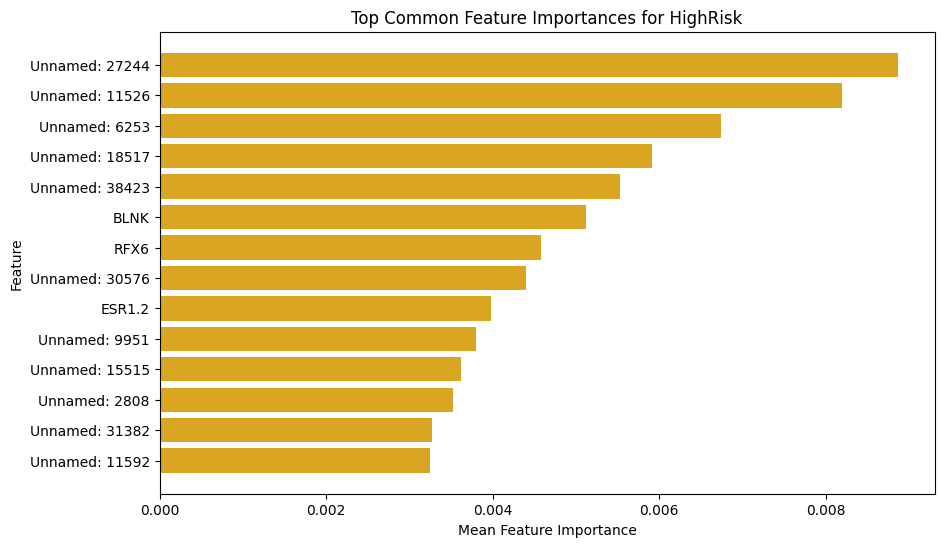

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize lists to store feature importances for each fold
feature_importances = []

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Iterate over each split
for train_index, test_index in skf.split(X, y):
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y[train_index], y[test_index]

    # Fit the Random Forest Classifier
    rfc.fit(X_train_temp, y_train_temp)

    # Get feature importances from the trained model
    importances = rfc.feature_importances_
    feature_importances.append(importances)

# Calculate the mean feature importances across all folds
mean_feature_importances = np.mean(feature_importances, axis=0)

# Sort the common features by their corresponding importances in descending order
sorted_common_features = [X.columns[feature] for feature in sorted(common_features, key=lambda x: mean_feature_importances[x], reverse=False)]

# Select the top N common features (e.g., top 100 features)
num_top_features = 100
top_common_features = sorted_common_features[:num_top_features]

# Plot the top common feature importances in a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_common_features)), [mean_feature_importances[X.columns.get_loc(feature)] for feature in top_common_features], align="center", color="goldenrod")
plt.yticks(range(len(top_common_features)), top_common_features)
plt.xlabel("Mean Feature Importance")
plt.ylabel("Feature")
plt.title("Top Common Feature Importances for HighRisk")
plt.show()

### Hyperparameter tuning and Cross Validation

Stratified Cross-Validation on X_train for multiclass INSS.Stage clinical endpoint, after hyperparameter tuning (cv=3) because stage2 has only 3 samples

Conducting a 3-fold cross-validation on the training dataset after hyperparameter tuning is a prudent approach in machine learning. This practice allows to evaluate the model's generalization performance within the training dataset without risking data leakage from the reserved test data. In addition CV provides a valuable assessment of how well your model performs across different subsets of the training data and seeing the anomalies on the data which offering a reasonable estimate of its potential performance on unseen data. Moreover, comparing the cross-validation results to the initial single random split helps me estimate the consistency of your model's performance and builds confidence in the reliability of that single split. In otherwords, I have performed the train and test split from original data and I have one split for trainset only but in order to understand how this split reflects the overall dataset, this approach is very valuable.

##### Set the X and y

In [20]:
####X feature matrix
#### Import selected features for HighRisk
selected_features_hr = pd.read_csv("final_common_features_for_HighRisk.csv",index_col=False)
##
#### Put them in a list
selected_features = selected_features_hr['FeatureName'].tolist()

# # Subset X_train to include only the selected features
X_sub_hr = X_train[selected_features]
X_sub_hr

# # y_hr or  y_hr_encode

,Unnamed: 8736,Unnamed: 5824,Unnamed: 43261,TUBA1A,Unnamed: 27066,Unnamed: 10275,Unnamed: 28860,Unnamed: 27967,Unnamed: 16582,Unnamed: 7357,...,Unnamed: 13566,Unnamed: 2062,OR8K3,Unnamed: 41668,Unnamed: 29982,Unnamed: 30203,Unnamed: 36115,Unnamed: 24621,Unnamed: 7785,Unnamed: 5909
ID,,,,,,,,,,,,,,,,,,,,,
ICGC_466,1.027590,-0.766720,0.040716,0.293264,0.357885,0.236972,0.349698,-0.434965,0.198420,0.450173,...,-1.549636,0.479262,0.134758,0.196330,-0.670453,-0.006859,0.129686,0.060893,0.089296,0.168328
ICGC_292,-0.000127,-0.876848,0.308293,0.000584,-1.117675,-0.005921,-0.298251,0.509076,0.468022,-0.235063,...,1.153925,0.155824,-1.167311,0.247757,0.186808,0.445906,-1.354283,-0.204401,-0.474925,0.188274
ICGC_032,1.314746,0.988845,0.686593,0.688778,0.136125,0.579881,1.039450,0.808244,0.259462,0.840685,...,0.694320,0.567782,-1.270445,1.019158,0.786132,-1.045557,0.645391,1.086699,-0.094404,1.145637
ICGC_408,-1.443464,-2.353854,-0.974234,-1.700126,-0.315926,-0.477421,-1.338104,-0.740781,-1.058026,-2.187620,...,0.891294,-2.138885,-0.277779,-1.312186,-0.533898,1.111738,-1.291136,-1.044501,1.808202,0.347834
ICGC_108,1.050260,0.276254,0.132984,0.356547,0.392002,0.165533,0.307895,0.728466,0.513804,0.125975,...,0.779289,0.373719,0.560187,0.719169,0.186808,-0.546183,0.255981,0.529580,-0.763596,0.417642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICGC_309,0.037657,-0.267906,0.511283,0.241847,0.289651,0.286980,0.485558,0.655336,0.315418,0.192289,...,1.296828,0.809509,-0.986826,0.530604,0.186808,-0.006859,0.298079,0.220070,-0.658625,0.866406
ICGC_371,0.030100,-0.131866,0.262159,0.048046,-0.793564,0.658464,-0.549070,-1.006708,0.315418,-0.154014,...,0.018430,0.317543,0.495728,-0.095088,0.406813,1.657720,0.392801,0.370403,0.194267,0.666955
ICGC_107,2.554050,1.280359,0.963397,1.210857,1.731095,0.422715,0.318346,0.259770,0.895316,1.489081,...,1.459042,0.962717,-0.587181,0.993444,0.543368,-1.438398,0.666441,0.803718,0.246753,0.776653


X_sub_hr   y_hr or  y_hr_encode

#### RANDOM FOREST HYPERPARAMETER TUNING FOR SELECTED FEATURES

In [22]:
#Import necessary libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

##############FOR RANDOM FOREST-HYPER PARAMETER TUNING#########################

# Set the parameters for grid search (for Random Forest) #we can give choices inside in list as much as we want
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]#choices 2,5 and 10
}

# Initialize a RandomForestClassifier (define the Random Forest classifier)
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV (define the grid search algorithm)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5) #here in param_grid ,we provide the param_grid that we set above

# Fit GridSearchCV
grid_search.fit(X_sub_hr, y_hr_encode)
#during grid search for train set, every possible combinations of the parameter choices that we set above will be tested.
#And for ever single parameter combination, it will run cross_validation for 5 folds

#after that we obtain the best parameters from the grid search

# Get the best parameters (for the random forest)
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

Best parameters for RandomForestClassifier:  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


#### RANDOM FOREST CROSS VALIDATION FOR SELECTED FEATURES

Confusion Matrix for Fold 0 with HighRisk:
    HR  LR
HR  42   4
LR   4  50
Confusion Matrix for Fold 1 with HighRisk:
    HR  LR
HR  41   5
LR   6  47
Confusion Matrix for Fold 2 with HighRisk:
    HR  LR
HR  43   2
LR   4  50
Mean Accuracy: 0.9160942760942761
Mean Precision: 0.9304368471035138
Mean Recall: 0.9128814348940136
Mean F1-score: 0.921520082526372
Mean ROC-AUC: 0.9629170506756871
Mean PR-AUC: 0.9700027365054424


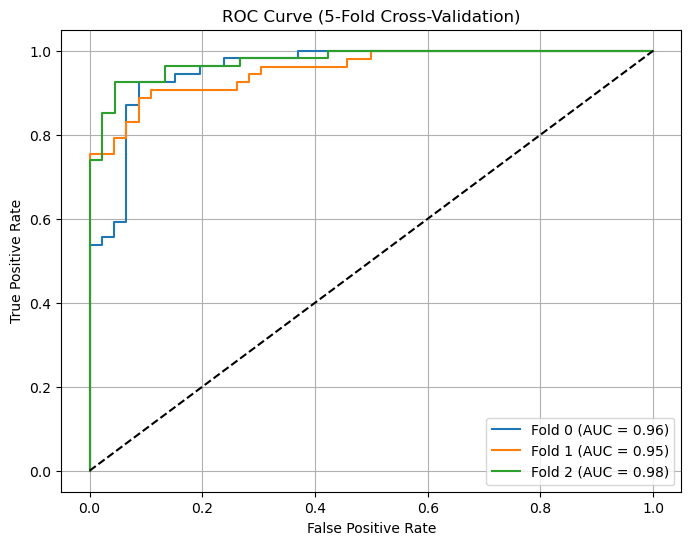

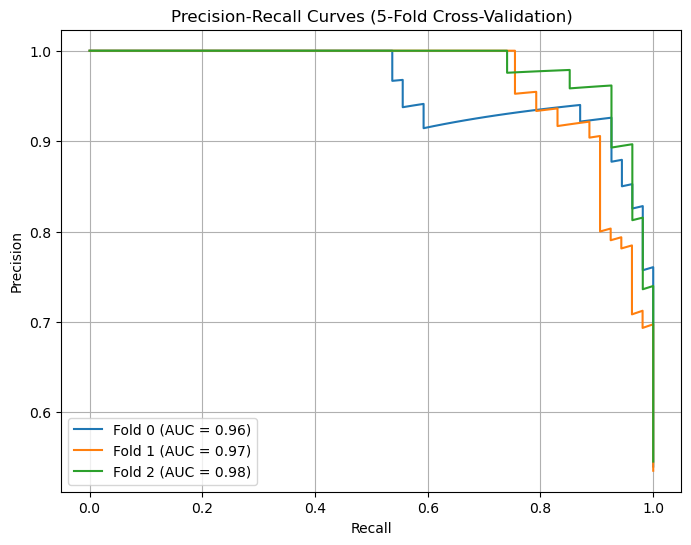

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_hr.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_sub_hr.values, y_hr_encode):
    X_train, X_test = X_sub_hr.iloc[train_index], X_sub_hr.iloc[test_index]
    y_train, y_test = y_hr_encode[train_index], y_hr_encode[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()


#### SVM (RADIAL) HYPERPARAMETER TUNING FOR SELECTED FEATURES

In [24]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import optuna #hyperparameter optimizer
import matplotlib.pyplot as plt

In [25]:
#import the train-test split library
from sklearn.model_selection import train_test_split
#X_sub_hr   y_hr or  y_hr_encode


#Split the data (20% for test, because we have small dataset)
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_sub_hr, y_hr_encode, test_size=0.2, random_state=1)

#Check the dimensions of the data

In [26]:
########FOR SUPPORT VECTOR MACHINE-HYPER PARAMETER TUNING (we use optuna) ########################
import optuna

# Define the objective function for optuna
def objective(trial):
    
    C = trial.suggest_loguniform('C', 1e-4, 1e4) # C value hyperparameter and we are searching a parameter from 1e-4 to 1e4 
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4) #kernel hyperparameter
    
    svm = SVC(C=C, gamma=gamma, random_state=42, probability=True)
    svm.fit(X_train_hr, y_train_hr)
    predictions = svm.predict(X_test_hr)
    
    return accuracy_score(y_test_hr, predictions)

# Run optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#We then get the best parameters

# Get the best parameters
best_params = study.best_params
print('Best parameters for SVC: ', best_params)

[I 2023-10-20 19:16:25,029] A new study created in memory with name: no-name-8781a691-a70d-4b96-b188-8576efd2d512
C:\Users\isile\AppData\Local\Temp\ipykernel_9252\1951585411.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4) # C value hyperparameter and we are searching a parameter from 1e-4 to 1e4
C:\Users\isile\AppData\Local\Temp\ipykernel_9252\1951585411.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4) #kernel hyperparameter
[I 2023-10-20 19:16:25,065] Trial 0 finished with value: 0.5833333333333334 and parameters: {'C': 0.020023299568008635, 'gamma': 137.57672284783

Best parameters for SVC:  {'C': 166.6342834696808, 'gamma': 0.0028763588986747616}


#### SVM (RADIAL) CROSS VALIDATION FOR SELECTED FEATURES

Confusion Matrix for Fold 0 with HighRisk:
    HR  LR
HR  41   5
LR   2  52
Confusion Matrix for Fold 1 with HighRisk:
    HR  LR
HR  42   4
LR   5  48
Confusion Matrix for Fold 2 with HighRisk:
    HR  LR
HR  42   3
LR   4  50
Mean Accuracy: 0.9227946127946128
Mean Precision: 0.9262512837488011
Mean Recall: 0.9315164220824599
Mean F1-score: 0.9286006968249959
Mean ROC-AUC: 0.9692246449956169
Mean PR-AUC: 0.9754927786733599


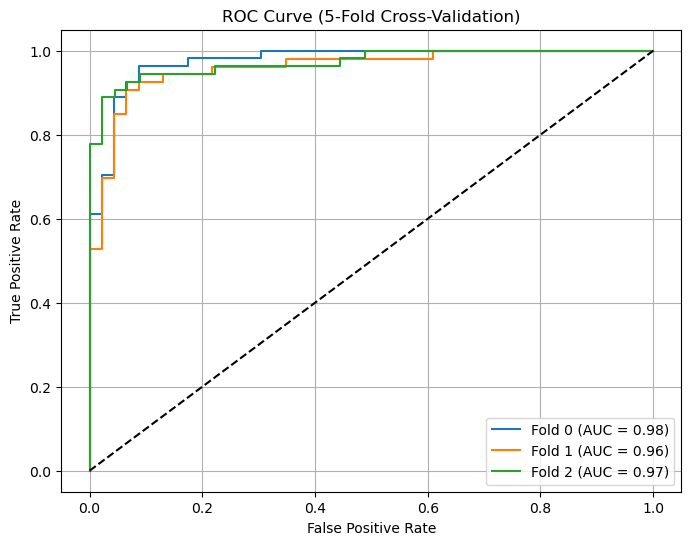

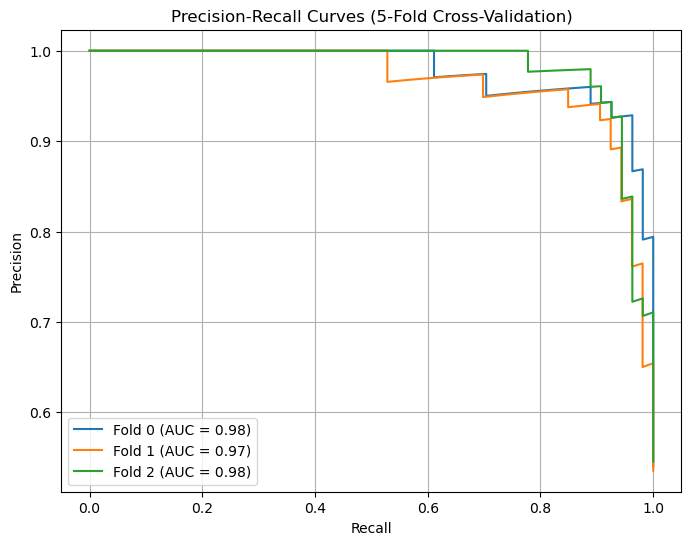

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a SVM classifier
# Specify hyperparameters
C_value = 166.6342834696808
gamma_value = 0.0028763588986747616

# Create a SVM classifier
clf = SVC(C=C_value, gamma=gamma_value, random_state=42, probability=True)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_hr.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_sub_hr.values, y_hr_encode):
    X_train, X_test = X_sub_hr.iloc[train_index], X_sub_hr.iloc[test_index]
    y_train, y_test = y_hr_encode[train_index], y_hr_encode[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION HYPERPARAMETER TUNING FOR SELECTED FEATURES

In [29]:
##############FOR LOGISTIC REGRESSION-HYPER PARAMETER TUNING #########################
from sklearn.linear_model import LogisticRegression
# Set the parameters for random search (for logistic regression)
param_grid = {
    'C': np.logspace(-4, 4, 20),#this search is really large space
    'penalty': ['l1'], #l1 loss
    'solver': ['liblinear']
}

# Initialize a LogisticRegression (define the Logistic regression classifier)
lr = LogisticRegression(random_state=42)

# Initialize Grid_SearchCV (define the random search algorithm#this time we want to use Random serach because we dont want to search the all the combinations)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit Grid_SearchCV
grid_search.fit(X_sub_hr, y_hr_encode)

#after that we  obtain the best parameters from the random search

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters for LogisticRegression: ', best_params)

Best parameters for LogisticRegression:  {'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}


#### LOGISTIC REGRESSION CROSS VALIDATION FOR SELECTED FEATURES

In [ ]:
#X_sub_hr   y_hr or  y_hr_encode

Confusion Matrix for Fold 0 with HighRisk:
    HR  LR
HR  42   4
LR   1  53
Confusion Matrix for Fold 1 with HighRisk:
    HR  LR
HR  41   5
LR   4  49
Confusion Matrix for Fold 2 with HighRisk:
    HR  LR
HR  41   4
LR   4  50
Mean Accuracy: 0.926094276094276
Mean Precision: 0.9210526315789473
Mean Recall: 0.9439785697647333
Mean F1-score: 0.9322562437827235
Mean ROC-AUC: 0.975627214733343
Mean PR-AUC: 0.9795286486595819


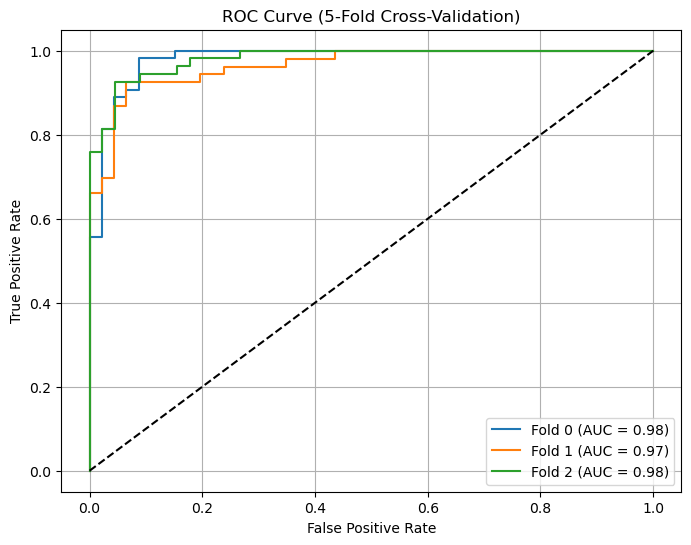

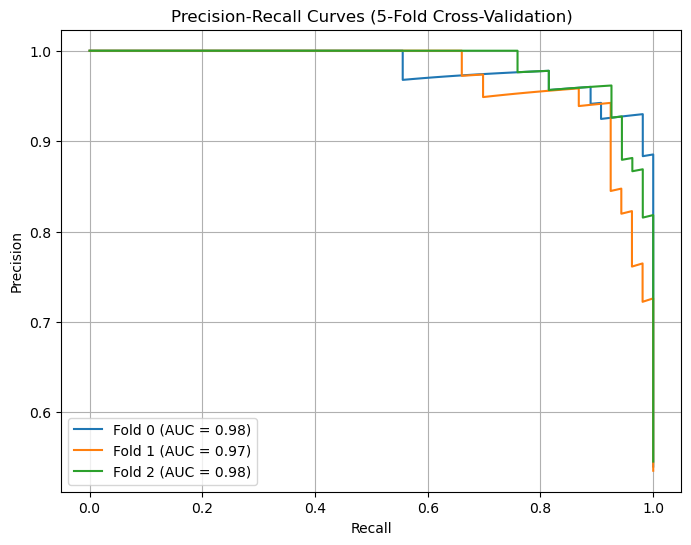

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = LogisticRegression(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_hr.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_sub_hr.values, y_hr_encode):
    X_train, X_test = X_sub_hr.iloc[train_index], X_sub_hr.iloc[test_index]
    y_train, y_test = y_hr_encode[train_index], y_hr_encode[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()



### HYPER PARAMETER TUNING AND CROSS VALIDATION FOR ALL FEATURES

#### For all Features (no selection) for HighRisk

In [31]:
X_train=pd.read_csv("X_train.csv", index_col="ID")
y_train=pd.read_csv("y_train.csv", index_col="ID")

X_all_hr=X_train.copy()

from sklearn.preprocessing import LabelEncoder
# #only get one target
y_hr=y_train["HighRisk"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class labels to numeric values
y_hr_encode = label_encoder.fit_transform(y_hr)

# Now, if you want to get the original labels from the encoded values:
original_labels = label_encoder.inverse_transform(y_hr_encode)

X_all_hr y_hr_encode

#### RANDOM FOREST HYPER PARAMETER TUNING FOR ALL FEATURES

In [32]:
#Import necessary libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

##############FOR RANDOM FOREST-HYPER PARAMETER TUNING#########################

# Set the parameters for grid search (for Random Forest) #we can give choices inside in list as much as we want
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]#choices 2,5 and 10
}

# Initialize a RandomForestClassifier (define the Random Forest classifier)
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV (define the grid search algorithm)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5) #here in param_grid ,we provide the param_grid that we set above

# Fit GridSearchCV
grid_search.fit(X_all_hr, y_hr_encode)
#during grid search for train set, every possible combinations of the parameter choices that we set above will be tested.
#And for ever single parameter combination, it will run cross_validation for 5 folds

#after that we obtain the best parameters from the grid search

# Get the best parameters (for the random forest)
best_params = grid_search.best_params_
print('Best parameters for RandomForestClassifier: ', best_params)

Best parameters for RandomForestClassifier:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


#### RANDOM FOREST CROSS VALIDATION FOR All FEATURES

In [ ]:
X_all_hr y_hr_encode

Confusion Matrix for Fold 0 with HighRisk:
    HR  LR
HR  42   4
LR   5  49
Confusion Matrix for Fold 1 with HighRisk:
    HR  LR
HR  40   6
LR   5  48
Confusion Matrix for Fold 2 with HighRisk:
    HR  LR
HR  42   3
LR   3  51
Mean Accuracy: 0.9127609427609428
Mean Precision: 0.9192872117400418
Mean Recall: 0.9191707430701141
Mean F1-score: 0.9191761855313256
Mean ROC-AUC: 0.963865004371795
Mean PR-AUC: 0.9701708069364562


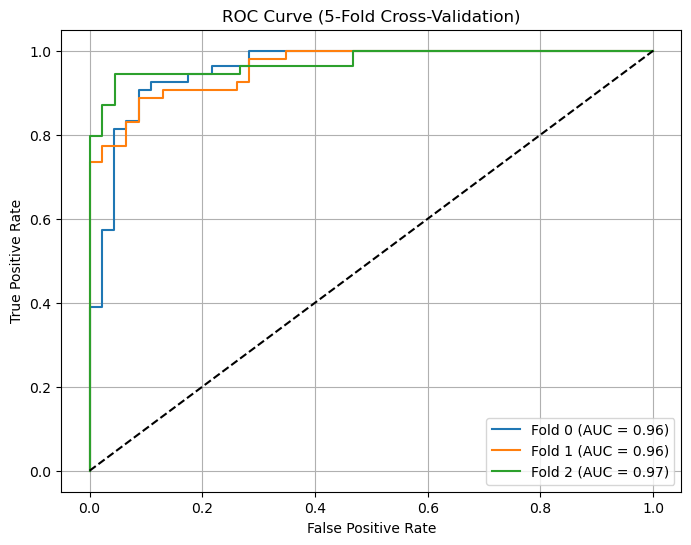

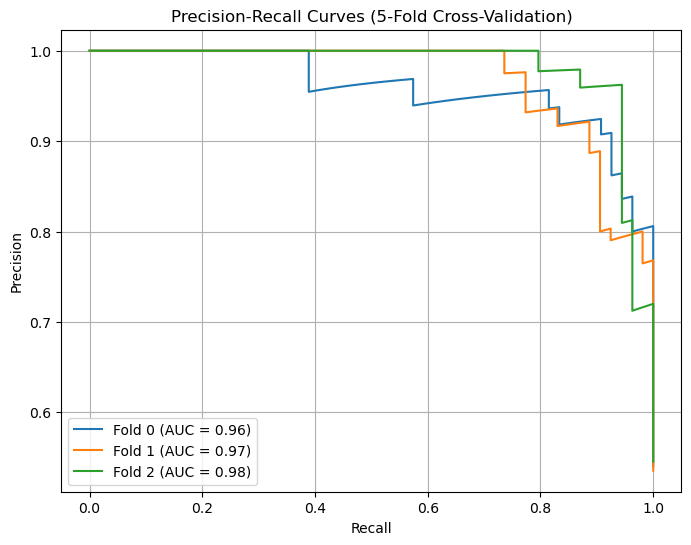

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_hr.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_all_hr.values, y_hr_encode):
    X_train, X_test = X_all_hr.iloc[train_index], X_all_hr.iloc[test_index]
    y_train, y_test = y_hr_encode[train_index], y_hr_encode[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()


#### SVM (RADIAL) HYPERPARAMETER TUNING FOR All FEATURES

In [35]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import optuna #hyperparameter optimizer
import matplotlib.pyplot as plt

In [36]:
#import the train-test split library
from sklearn.model_selection import train_test_split
#X_all_hr y_hr_encode


#Split the data (20% for test, because we have small dataset)
X_train_all_hr, X_test_all_hr, y_train_hr, y_test_hr = train_test_split(X_all_hr, y_hr_encode, test_size=0.2, random_state=1)

#Check the dimensions of the data

In [37]:
########FOR SUPPORT VECTOR MACHINE-HYPER PARAMETER TUNING (we use optuna) ########################
import optuna

# Define the objective function for optuna
def objective(trial):
    
    C = trial.suggest_loguniform('C', 1e-4, 1e4) # C value hyperparameter and we are searching a parameter from 1e-4 to 1e4 
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4) #kernel hyperparameter
    
    svm = SVC(C=C, gamma=gamma, random_state=42, probability=True)
    svm.fit(X_train_all_hr, y_train_hr)
    predictions = svm.predict(X_test_all_hr)
    
    return accuracy_score(y_test_hr, predictions)

# Run optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#We then get the best parameters

# Get the best parameters
best_params = study.best_params
print('Best parameters for SVC: ', best_params)

[I 2023-10-20 19:33:43,340] A new study created in memory with name: no-name-a224d6cf-c264-4687-be7f-98cca962f835
C:\Users\isile\AppData\Local\Temp\ipykernel_9252\1696660922.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4) # C value hyperparameter and we are searching a parameter from 1e-4 to 1e4
C:\Users\isile\AppData\Local\Temp\ipykernel_9252\1696660922.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e4) #kernel hyperparameter
[I 2023-10-20 19:33:46,578] Trial 0 finished with value: 0.5833333333333334 and parameters: {'C': 0.0004847107250636742, 'gamma': 0.001057032197

Best parameters for SVC:  {'C': 9596.400885372794, 'gamma': 0.00010226970955754852}


In [ ]:
X_all_hr y_hr_encode

#### SVM (RADIAL) CROSS VALIDATION FOR All FEATURES

Confusion Matrix for Fold 0 with HighRisk:
    HR  LR
HR  41   5
LR  11  43
Confusion Matrix for Fold 1 with HighRisk:
    HR  LR
HR  42   4
LR  15  38
Confusion Matrix for Fold 2 with HighRisk:
    HR  LR
HR  42   3
LR  10  44
Mean Accuracy: 0.838922558922559
Mean Precision: 0.9122551502870652
Mean Recall: 0.7760307477288609
Mean F1-score: 0.8381414612049439
Mean ROC-AUC: 0.9164811607706512
Mean PR-AUC: 0.9359697172472584


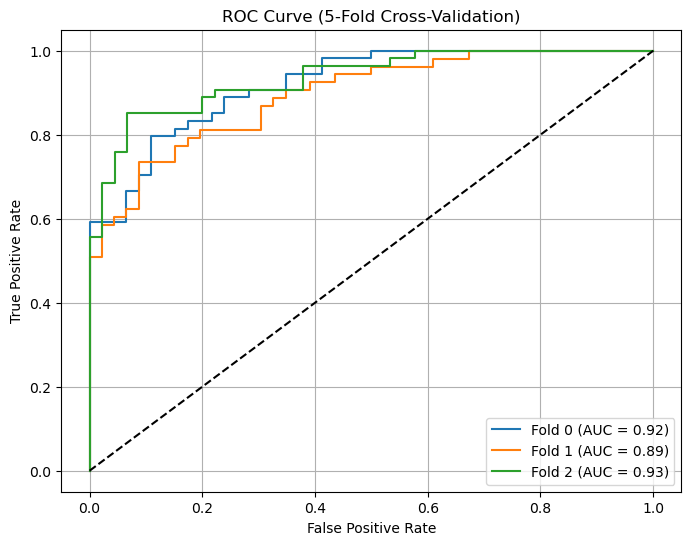

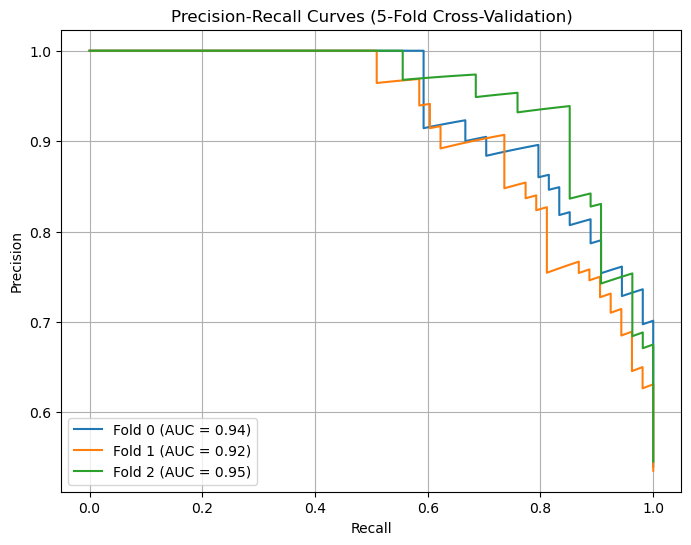

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a SVM classifier
# Specify hyperparameters
C_value = 9596.400885372794
gamma_value = 0.00010226970955754852

# Create a SVM classifier
clf = SVC(C=C_value, gamma=gamma_value, random_state=42, probability=True)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_hr.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_all_hr.values, y_hr_encode):
    X_train, X_test = X_all_hr.iloc[train_index], X_all_hr.iloc[test_index]
    y_train, y_test = y_hr_encode[train_index], y_hr_encode[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

#### LOGISTIC REGRESSION HYPERPARAMETER TUNING FOR ALL FEATURES

In [40]:
##############FOR LOGISTIC REGRESSION-HYPER PARAMETER TUNING #########################
from sklearn.linear_model import LogisticRegression
# Set the parameters for random search (for logistic regression)
param_grid = {
    'C': np.logspace(-4, 4, 20),#this search is really large space
    'penalty': ['l1'], #l1 loss
    'solver': ['liblinear']
}

# Initialize a LogisticRegression (define the Logistic regression classifier)
lr = LogisticRegression(random_state=42)

# Initialize Grid_SearchCV (define the random search algorithm#this time we want to use Random serach because we dont want to search the all the combinations)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit Grid_SearchCV
grid_search.fit(X_all_hr, y_hr_encode)

#after that we  obtain the best parameters from the random search

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters for LogisticRegression: ', best_params)

Best parameters for LogisticRegression:  {'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
X_all_hr y_hr_encode

#### LOGISTIC REGRESSION CROSS VALIDATION FOR ALL FEATURES

Confusion Matrix for Fold 0 with HighRisk:
    HR  LR
HR  43   3
LR   3  51
Confusion Matrix for Fold 1 with HighRisk:
    HR  LR
HR  44   2
LR   4  49
Confusion Matrix for Fold 2 with HighRisk:
    HR  LR
HR  44   1
LR   4  50
Mean Accuracy: 0.9429629629629629
Mean Precision: 0.9618736383442266
Mean Recall: 0.9316328907523875
Mean F1-score: 0.9463776963776963
Mean ROC-AUC: 0.9887593667255198
Mean PR-AUC: 0.9914963059593092


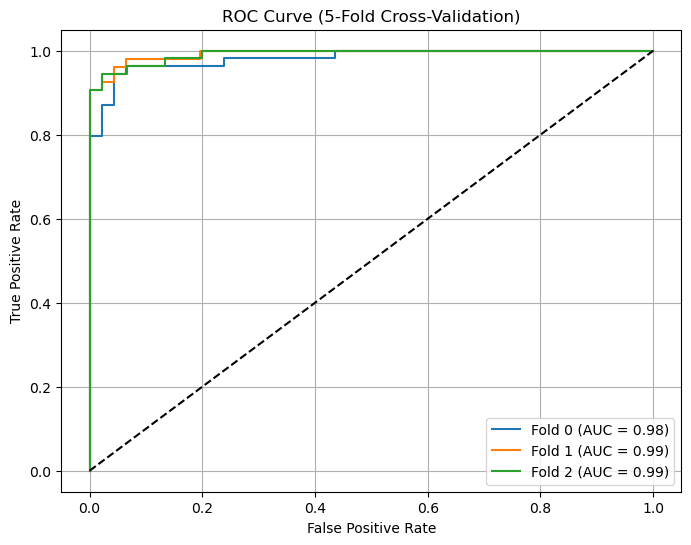

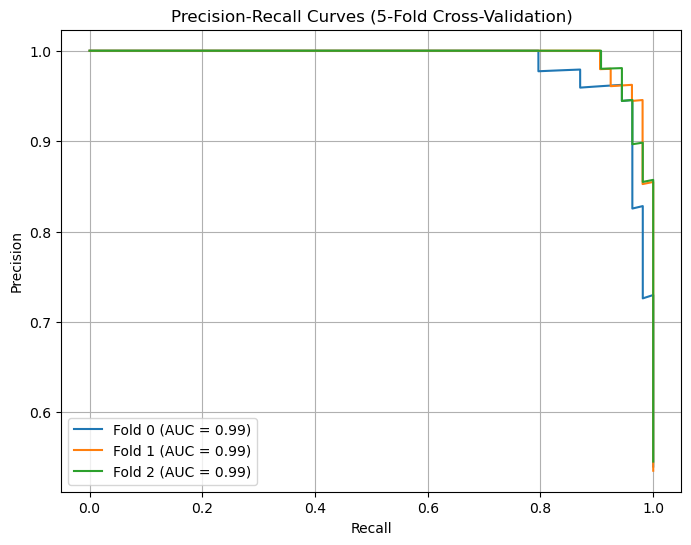

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = LogisticRegression(**best_params, random_state=42)

# Define the number of folds for cross-validation
n_splits = 3

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
pr_aucs = []

# Initialize variables for mean ROC-AUC and PR-AUC
mean_roc_auc = 0
mean_pr_auc = 0

# Initialize lists to store ROC and PR curves for each fold
roc_curves = []

# Initialize lists to store recall and precision values for each fold
recall_values = []
precision_values = []

# Initialize the list to store confusion matrices for each fold
confusion_matrices = []

# Define your binary class labels
class_labels = y_hr.unique()

# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X_all_hr.values, y_hr_encode):
    X_train, X_test = X_all_hr.iloc[train_index], X_all_hr.iloc[test_index]
    y_train, y_test = y_hr_encode[train_index], y_hr_encode[test_index]

    # Train the Random Forest classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_probs = clf.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Store the metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate ROC-AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])
    roc_aucs.append(roc_auc)
    roc_curves.append((fpr, tpr))

    # Calculate and append the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Calculate Precision-Recall values for this fold
    precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred_probs[:, 1])
    recall_values.append(recall_fold)
    precision_values.append(precision_fold)

    # Calculate PR-AUC for this fold
    pr_auc = average_precision_score(y_test, y_pred_probs[:, 1])
    pr_aucs.append(pr_auc)

    # Update mean ROC-AUC and PR-AUC
    mean_roc_auc += roc_auc
    mean_pr_auc += pr_auc

# Calculate mean ROC-AUC and PR-AUC across folds
mean_roc_auc /= n_splits
mean_pr_auc /= n_splits

# Print the confusion matrices for each fold
for i, conf_matrix in enumerate(confusion_matrices):
    confusion_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(f"Confusion Matrix for Fold {i} with HighRisk:")
    print(confusion_matrix_df)

# Print the mean metrics across folds
print("Mean Accuracy:", np.mean(accuracies))
print("Mean Precision:", np.mean(precisions))
print("Mean Recall:", np.mean(recalls))
print("Mean F1-score:", np.mean(f1_scores))
print("Mean ROC-AUC:", mean_roc_auc)
print("Mean PR-AUC:", mean_pr_auc)

# Plot the ROC curve for each fold and the mean ROC-AUC
plt.figure(figsize=(8, 6))
for i, (fpr, tpr) in enumerate(roc_curves):
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot the Precision-Recall curves for each fold
plt.figure(figsize=(8, 6))
for i, (recall, precision) in enumerate(zip(recall_values, precision_values)):
    pr_auc = pr_aucs[i]
    plt.plot(recall, precision, label=f'Fold {i} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (5-Fold Cross-Validation)')
plt.legend(loc='best')
plt.grid()
plt.show()
